### Import Libraries

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from matplotlib.image import imread

In [2]:
data_dir = "C:\\Users\\Christian Rhomel\\Documents\\COURSES\\4th_year_1st_sem\\TEECE1L\\Group Activity 2\\CNNActivity"
train_path = data_dir+'\\train'
test_path = data_dir+'\\test'

In [3]:
for i in range(1):
    print(os.listdir(data_dir))
    print(os.listdir(train_path))
    print(os.listdir(test_path))

['new_sample', 'test', 'train']
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


##### Train Directory

In [4]:
for i in range(1):
    print('Train Directory:')
    print(len(os.listdir(train_path+'\\buildings')), 'files in buildings folder')
    print(len(os.listdir(train_path+'\\forest')), 'files in forest folder')
    print(len(os.listdir(train_path+'\\glacier')), 'files in glacier folder')
    print(len(os.listdir(train_path+'\\mountain')), 'files in mountain folder')
    print(len(os.listdir(train_path+'\\sea')), 'files in sea folder')
    print(len(os.listdir(train_path+'\\street')), 'files in street folder')
    

Train Directory:
2191 files in buildings folder
2271 files in forest folder
2404 files in glacier folder
2512 files in mountain folder
2274 files in sea folder
2382 files in street folder


##### Test Directory

In [5]:
for i in range(1):
    print('Test Directory:')
    print(len(os.listdir(test_path+'\\buildings')), 'files in buildings folder')
    print(len(os.listdir(test_path+'\\forest')), 'files in forest folder')
    print(len(os.listdir(test_path+'\\glacier')), 'files in glacier folder')
    print(len(os.listdir(test_path+'\\mountain')), 'files in mountain folder')
    print(len(os.listdir(test_path+'\\sea')), 'files in sea folder')
    print(len(os.listdir(test_path+'\\street')), 'files in street folder')
    

Test Directory:
437 files in buildings folder
474 files in forest folder
553 files in glacier folder
525 files in mountain folder
510 files in sea folder
501 files in street folder


(-0.5, 149.5, 149.5, -0.5)

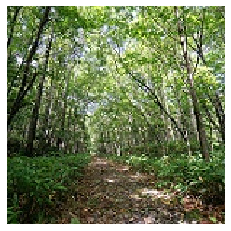

In [4]:
sample_image = imread(os.path.join(train_path+'\\forest', os.listdir(train_path+'\\forest')[1]))
plt.imshow(sample_image)
plt.axis('off')

In [10]:
sample_image

array([[[ 60,  83,  39],
        [ 29,  51,  12],
        [ 58,  81,  52],
        ...,
        [104, 118,  83],
        [ 60,  77,  35],
        [ 61,  78,  34]],

       [[ 29,  52,  10],
        [ 41,  63,  25],
        [174, 195, 162],
        ...,
        [ 84,  95,  61],
        [ 78,  93,  54],
        [119, 134,  91]],

       [[ 59,  79,  44],
        [ 26,  46,   9],
        [ 49,  69,  32],
        ...,
        [151, 158, 127],
        [ 86,  96,  61],
        [109, 120,  80]],

       ...,

       [[ 49,  77,  29],
        [ 60,  87,  44],
        [  0,  20,   0],
        ...,
        [ 68,  50,  28],
        [ 34,  27,   0],
        [ 66,  65,  35]],

       [[ 63,  87,  51],
        [  3,  27,   0],
        [  0,  14,   0],
        ...,
        [ 48,  32,   9],
        [ 62,  55,  27],
        [125, 122,  91]],

       [[  3,  27,   0],
        [  7,  31,   0],
        [ 44,  65,  32],
        ...,
        [193, 179, 153],
        [ 66,  59,  31],
        [ 62,  57,  27]]

In [7]:
dim1 = []
dim2 = []


for folders in os.listdir(train_path):
    for img in os.listdir(train_path+'\\'+folders):
        img_arr = imread(train_path+'\\'+folders+'\\'+img)
        d1, d2, color = img_arr.shape
        dim1.append(d1)
        dim2.append(d2)
        

In [8]:
print('(',np.mean(dim1),',',np.mean(dim2),',', color,')')


( 149.90872167592988 , 150.0 , 3 )


In [9]:
image_shape = (150,150,3)

### Data Preparation

##### Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_datagen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale = 1./255, # Rescaling
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                            )

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

#### Comparison of Original Image and Augmented Image

Text(0.5, 1.0, 'Augmented Image')

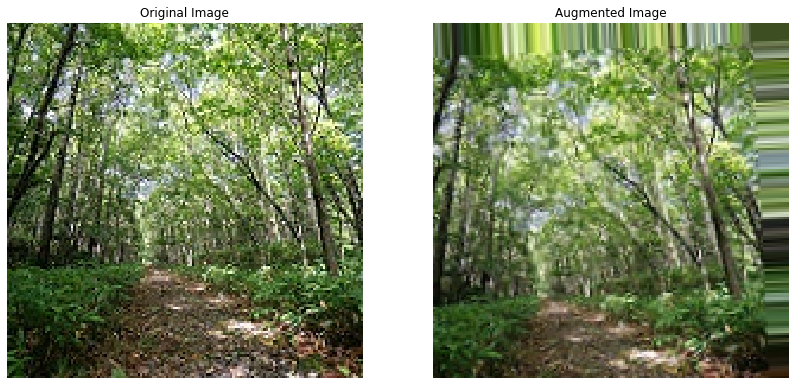

In [15]:
plt.figure(figsize=(14,14))
plt.subplot(1,2,1)
plt.imshow(sample_image)
plt.axis('off')
plt.title('Original Image')

sample_img = train_datagen.random_transform(sample_image)
plt.subplot(1,2,2)
plt.imshow(sample_img)
plt.axis('off')
plt.title('Augmented Image')

### Building the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_shape))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 78400)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)             

### Model Training 

In [26]:
train_generator = train_datagen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode='rgb',
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle=True)


test_generator = test_datagen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', 
                                                    batch_size=32, class_mode='categorical', shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [27]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [28]:
results = model.fit_generator(train_generator, validation_data=test_generator, epochs=20, callbacks=[early_stop])

Epoch 1/20
439/439 [==============================] - 3551s 8s/step - loss: 1.0575 - accuracy: 0.5936 - val_loss: 0.8130 - val_accuracy: 0.6947
Epoch 2/20
439/439 [==============================] - 3466s 8s/step - loss: 0.8029 - accuracy: 0.6961 - val_loss: 0.5961 - val_accuracy: 0.7923
Epoch 3/20
439/439 [==============================] - 3496s 8s/step - loss: 0.6872 - accuracy: 0.7495 - val_loss: 0.5817 - val_accuracy: 0.7933
Epoch 4/20
439/439 [==============================] - 3380s 8s/step - loss: 0.6237 - accuracy: 0.7736 - val_loss: 0.5349 - val_accuracy: 0.8157
Epoch 5/20
439/439 [==============================] - 3371s 8s/step - loss: 0.5866 - accuracy: 0.7894 - val_loss: 0.5142 - val_accuracy: 0.8213
Epoch 6/20
439/439 [==============================] - 3386s 8s/step - loss: 0.5521 - accuracy: 0.8030 - val_loss: 0.4875 - val_accuracy: 0.8333
Epoch 7/20
439/439 [==============================] - 3372s 8s/step - loss: 0.5329 - accuracy: 0.8065 - val_loss: 0.5218 - val_accuracy:

In [30]:
model.save('CNN_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN_model\assets


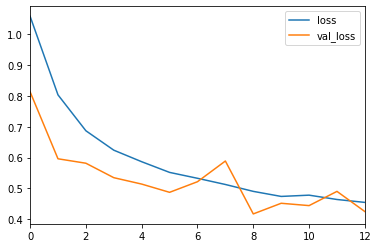

In [31]:
metrics = pd.DataFrame(model.history.history)
metrics[['loss','val_loss']].plot()

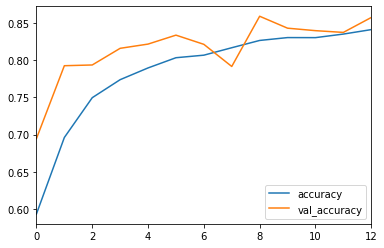

In [32]:
metrics[['accuracy','val_accuracy']].plot()

### Model Evaluation

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
pred_probabilities = model.predict_generator(test_generator)
pred_probabilities

array([[8.8206202e-01, 6.0375476e-07, 1.1506198e-04, 9.8275586e-06,
        9.0234548e-02, 2.7578045e-02],
       [6.4895993e-01, 4.1581621e-05, 2.5723735e-04, 6.8444664e-05,
        1.2083442e-03, 3.4946451e-01],
       [9.7734070e-01, 3.2079972e-10, 2.4221185e-07, 1.5082969e-07,
        5.6463105e-06, 2.2653397e-02],
       ...,
       [3.4413624e-03, 1.3315105e-03, 1.7875439e-02, 4.3084747e-01,
        5.4004973e-01, 6.4544571e-03],
       [9.8239774e-01, 1.0361210e-09, 4.9741300e-07, 3.9425139e-08,
        3.0992211e-05, 1.7570723e-02],
       [4.1328329e-03, 6.5489927e-05, 5.2623986e-05, 1.2427762e-07,
        1.2918183e-05, 9.9573600e-01]], dtype=float32)

In [43]:
predictions = np.argmax(pred_probabilities, axis=1)
predictions

array([0, 0, 0, ..., 4, 0, 5], dtype=int64)

In [44]:
print(classification_report(test_generator.classes, predictions,))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       437
           1       0.99      0.95      0.97       474
           2       0.87      0.75      0.81       553
           3       0.80      0.81      0.80       525
           4       0.85      0.89      0.87       510
           5       0.85      0.88      0.87       501

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000



In [46]:
confusion_matrix(test_generator.classes, predictions)

array([[386,   0,   1,   1,   6,  43],
       [  9, 448,   0,   2,   1,  14],
       [  9,   2, 416,  87,  26,  13],
       [ 13,   2,  38, 425,  46,   1],
       [ 10,   0,  25,  14, 456,   5],
       [ 53,   2,   0,   2,   4, 440]], dtype=int64)

### Predicting New Samples

In [3]:
from tensorflow.keras.models import load_model

In [4]:
model = load_model('CNN_model')

In [5]:
dir_path = "C:\\Users\\Christian Rhomel\\Documents\\COURSES\\4th_year_1st_sem\\TEECE1L\\Group Activity 2\\CNNActivity\\new_sample"
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

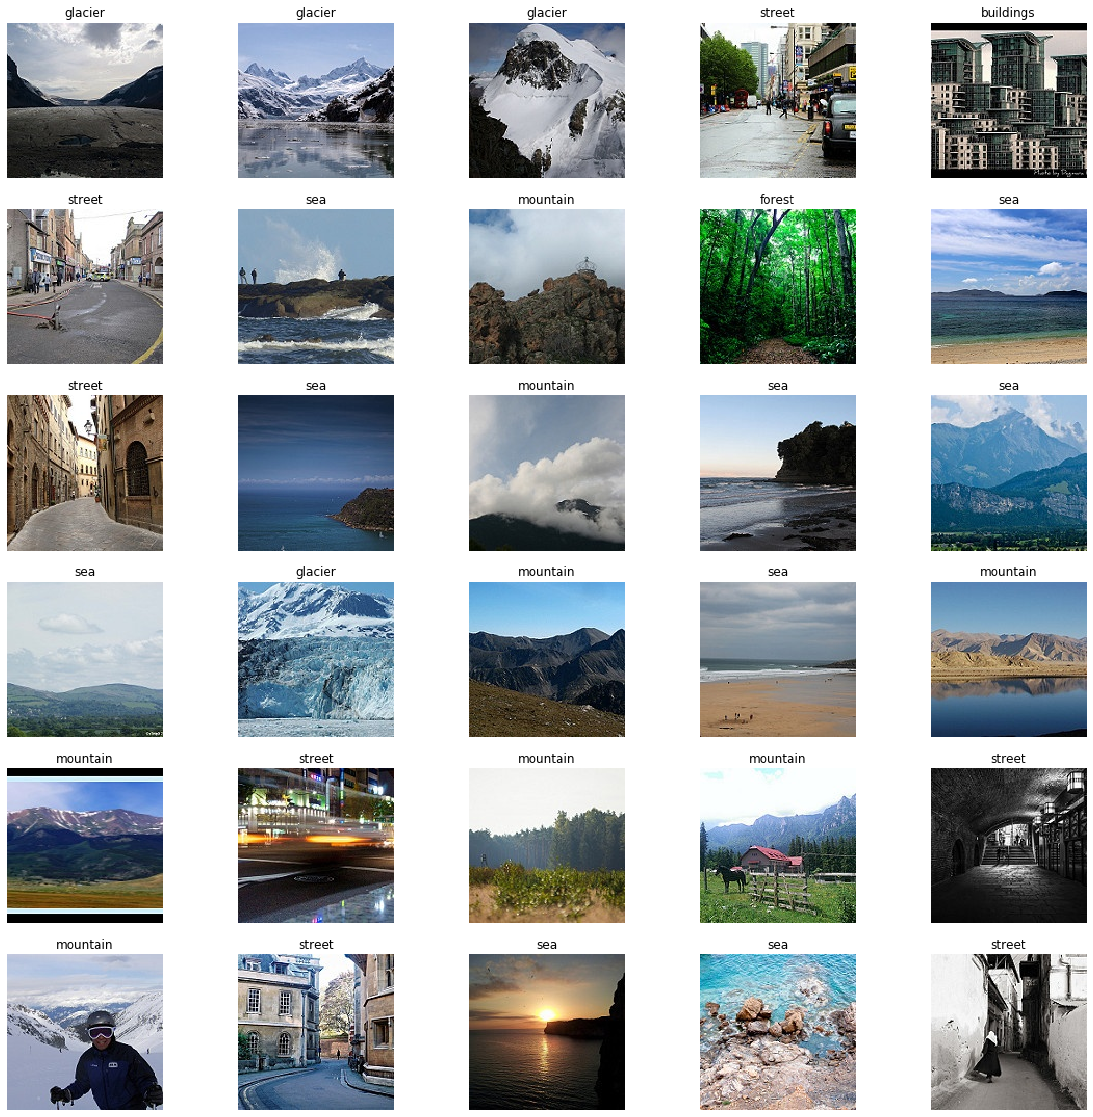

In [10]:
# Generate Random Numbers
lst = []

for i in range(30):
    j = np.random.randint(0,len(os.listdir(dir_path)))
    if j not in lst:
        lst.append(j)

# Model Prediction of New Samples
plt.figure(figsize=(20,20))
for i in range(30):
    img_path = os.path.join(dir_path, os.listdir(dir_path)[lst[i]])
    img_array = imread(img_path)
    img_reshaped = img_array.reshape(1,150,150,3)
    img_rescaled = img_reshaped/255
    new_pred = model.predict(img_rescaled)
    
    label = class_names[np.argmax(new_pred)]
    ax = plt.subplot(6,5, i+1)
    plt.imshow(img_array)
    plt.title(label)
    plt.axis('off')